In [ ]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=2d0e74fc0741ae419693c05d25b88405ce8f02b080c4ee38aeeda5aae56504c1
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [ ]:
# Create a list of US stocks
stock_symbols = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'BRK-A', 'NVDA',
    'JPM', 'JNJ', 'V', 'PG', 'UNH', 'MA', 'DIS', 'HD', 'BAC', 'VZ',
    'INTC', 'KO', 'PFE', 'WMT', 'MRK', 'PEP', 'T', 'BA', 'XOM', 'ABBV',
    'NKE', 'MCD', 'CSCO', 'DOW', 'ADBE', 'IBM', 'CVX', 'CRM', 'ABT', 'MDT',
    'PYPL', 'NEE', 'COST', 'AMGN', 'CMCSA', 'NFLX', 'ORCL', 'PM', 'HON', 'ACN',
    'TMO', 'AVGO'
]

# Fetch the data from Yahoo Finance
df = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start='2015-01-01', end='2023-01-01')
    df[symbol] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
print(type(df))

<class 'dict'>


In [ ]:
df['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435268,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746889,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749126,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082142,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007429,237458000
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142441,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400


In [ ]:
stationary_stocks = []
p_values = []

for symbol, data in df.items():
    result = adfuller(data['Close'])
    # A p-value less than 0.05 indicates that the data is stationary
    p_value = result[1]
    if p_value <= 0.05:
        stationary_stocks.append(symbol)
        p_values.append(p_value)

print("Stocks suitable for mean reversion strategy:")
for stock, p_value in zip(stationary_stocks, p_values):  # Use zip to iterate over both lists simultaneously
    print(f"Stock: {stock}, p-value: {p_value:.4f}")

Stocks suitable for mean reversion strategy:
Stock: IBM, p-value: 0.0125


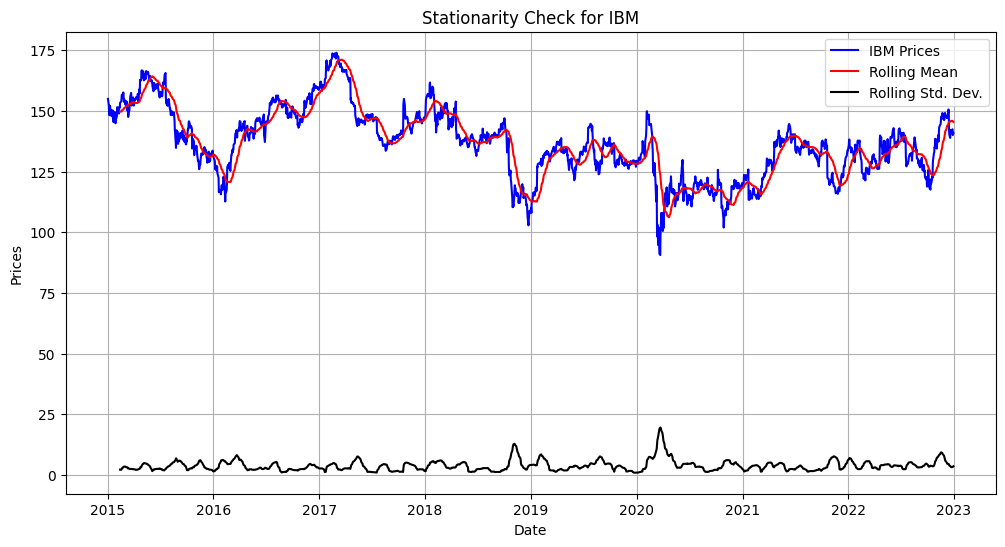

In [ ]:
def plot_stationary_stocks(df, stationary_stocks):
    for stock in stationary_stocks:
        data = df[stock].Close

        # Calculate rolling statistics
        rolling_mean = data.rolling(window=30).mean()  # 30-day rolling mean
        rolling_std = data.rolling(window=30).std()   # 30-day rolling standard deviation

        # Plot the statistics
        plt.figure(figsize=(12, 6))
        plt.plot(data, label=f'{stock} Prices', color='blue')
        plt.plot(rolling_mean, label='Rolling Mean', color='red')
        plt.plot(rolling_std, label='Rolling Std. Dev.', color='black')
        plt.title(f'Stationarity Check for {stock}')
        plt.xlabel('Date')
        plt.ylabel('Prices')
        plt.legend()
        plt.grid(True)
        plt.show()


# Calling the function
plot_stationary_stocks(df, stationary_stocks)

In [ ]:
class MeanReversion(Strategy):
    n1 = 30  # Period for the moving average

    def init(self):
        # Compute moving average
        self.offset = 0.01  # Buy/sell when price is 1% below/above the moving average
        prices = self.data['Close']
        self.ma = self.I(self.compute_rolling_mean, prices, self.n1)

    def compute_rolling_mean(self, prices, window):
        return [(sum(prices[max(0, i - window):i]) / min(i, window)) if i > 0 else np.nan for i in range(len(prices))]

    def next(self):
        size = 0.1
        # If price drops to more than offset% below n1-day moving average, buy
        if self.data['Close'] < self.ma[-1] * (1 - self.offset):
            if self.position.size < 0:  # Check for existing short position
                self.buy()  # Close short position
            self.buy(size=size)

        # If price rises to more than offset% above n1-day moving average, sell
        elif self.data['Close'] > self.ma[-1] * (1 + self.offset):
            if self.position.size > 0:  # Check for existing long position
                self.sell()  # Close long position
            self.sell(size=size)

In [ ]:
stock_to_backtest = stationary_stocks[0]
df = df[stock_to_backtest]
bt = Backtest(df, MeanReversion, cash=100000, commission=.002)
stats = bt.run()
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1315', ...)

In [ ]:
print(stats)

Start                     2015-01-02 00:00:00
End                       2022-12-30 00:00:00
Duration                   2919 days 00:00:00
Exposure Time [%]                   99.851043
Equity Final [$]                215950.326866
Equity Peak [$]                 226267.755381
Return [%]                         115.950327
Buy & Hold Return [%]               -9.063962
Return (Ann.) [%]                   10.112275
Volatility (Ann.) [%]                24.05098
Sharpe Ratio                         0.420452
Sortino Ratio                         0.70408
Calmar Ratio                         0.287706
Max. Drawdown [%]                  -35.147951
Avg. Drawdown [%]                   -4.002909
Max. Drawdown Duration      689 days 00:00:00
Avg. Drawdown Duration       50 days 00:00:00
# Trades                                 1519
Win Rate [%]                        72.021066
Best Trade [%]                       25.69997
Worst Trade [%]                    -15.854292
Avg. Trade [%]                    